In [131]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from statistics import mode

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

In [91]:
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.5, random_state=50)

In [97]:
# create np array for data points
points = StandardScaler().fit_transform(data[0])
labels = data[1]

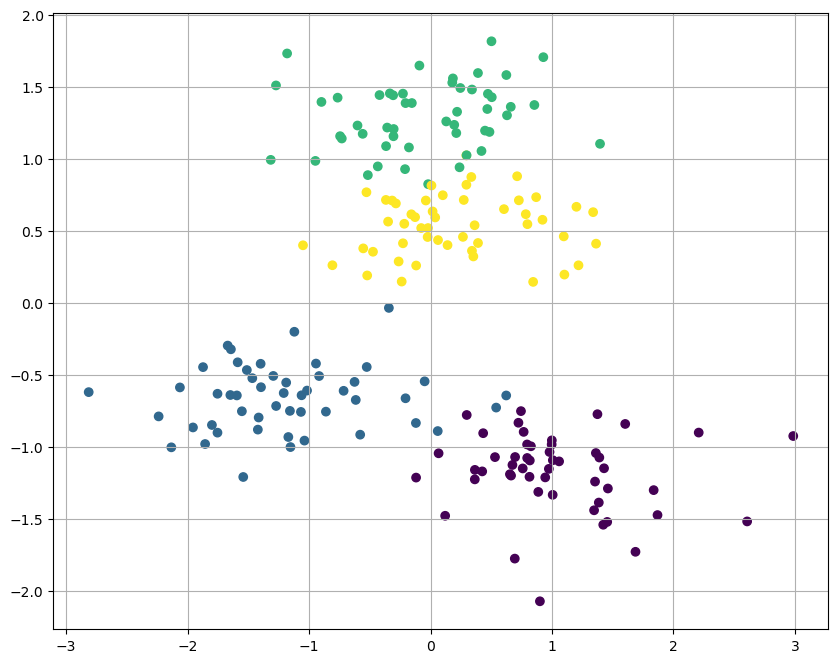

In [99]:
# create scatter plot
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:,1], c=labels, cmap='viridis')
plt.grid()
plt.show()

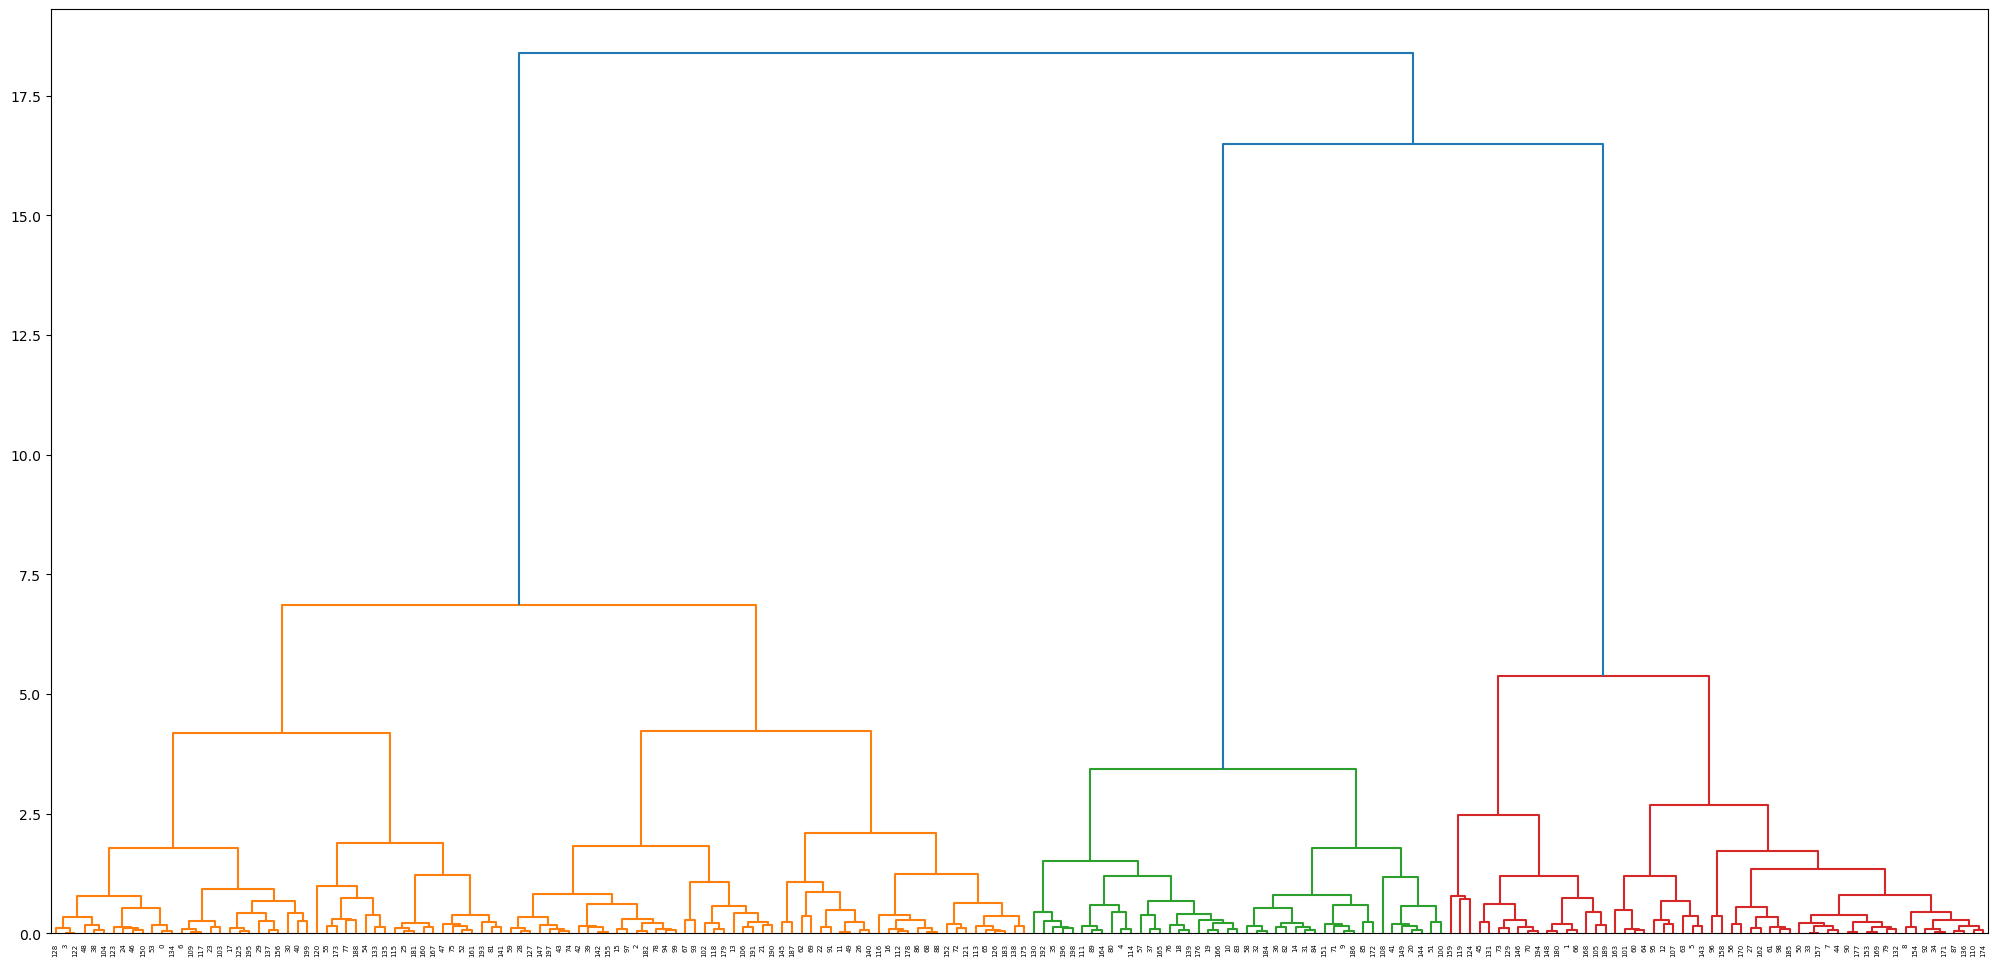

In [101]:
# create dendrogram
plt.figure(figsize=(25,12))
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

In [147]:
K = 12

In [170]:
# Aglomerative Accuracy 
y_hc = AgglomerativeClustering(n_clusters=K, metric = 'euclidean', linkage = 'ward').fit_predict(points)

moda_hc = np.array([mode(labels[y_hc==i]) for i in range(K)], dtype=int)

print("Tasa de Aciertos (Jerárquico K=12): ", np.mean(moda_hc[y_hc] == labels))

Tasa de Aciertos (Jerárquico K=12):  0.93


In [174]:
# Kmeans Accuracy
y_kmed = KMeans(n_clusters=K, n_init='auto').fit_predict(points)

moda_kmed = np.array([mode(labels[y_kmed==i]) for i in range(K)], dtype=int)

print("Tasa de Aciertos (K-medias K=12): ", np.mean(moda_kmed[y_kmed] == labels))

Tasa de Aciertos (K-medias K=12):  0.945
